# Training a Small Convent Model from Scratch!
#### The relevance of deep learning for small-data problems
You’ll sometimes hear that deep learning only works when lots of data is available. This is valid but what constitutes lots of samples is relative relative to the size and depth of the network you’re trying to train, for starters. It isn’t possible to train a convnet to solve a complex problem with just a few tens of samples, but a few hundred can potentially suffice if the model is small and well regularized and the task is simple. Because convnets learn local, translation-invariant features, they’re highly data efficient on perceptual problems. Training a convnet from scratch on a very small image dataset will still yield reasonable results despite a relative lack of data, without the need for any custom feature engineering. You’ll see this in action in this section/notebook.

## Step 1: Make or arrange Dataset!
Copying images to training, validation, and test directories!

#### "os" is Operating System library and "shutil" is used for File Transactions in System!

In [1]:
import os, shutil

#### Linking & making directories and sub-directories!

In [2]:
origial_dataset_dir = r'G:\AI Machine Learning\Quater 3 (Deep Learning in Practice)\1. DeepLearning for Computer Vision\CNN Models\New folder\train'

In [3]:
base_dir = r'G:\AI Machine Learning\Quater 3 (Deep Learning in Practice)\1. DeepLearning for Computer Vision\CNN Models\New folder\data'
os.mkdir(base_dir)

In [4]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [6]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [7]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#### Transfering the data into the Directories!

#### 1) For Cats

In [8]:
fnames = [f'cat.{i}.jpg' for i in range(1000)]  # File name String!

for fname in fnames:
    src = os.path.join(origial_dataset_dir, fname)  # Source!
    dst = os.path.join(train_cats_dir, fname)   # Destination!
    shutil.copyfile(src, dst)   # Copy pasting of Images!

In [9]:
fnames = [f'cat.{i}.jpg' for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(origial_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [10]:
fnames = [f'cat.{i}.jpg' for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(origial_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#### 2) For Dogs

In [11]:
fnames = [f'dog.{i}.jpg' for i in range(1000)]  # File name String!
for fname in fnames:
    src = os.path.join(origial_dataset_dir, fname)  # Source!
    dst = os.path.join(train_dogs_dir, fname)   # Destination!
    shutil.copyfile(src, dst)   # Copy pasting of Images!

fnames = [f'dog.{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(origial_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'dog.{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(origial_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

##### Now we have total 2000 Images, 1000 Training Images, 500 validation Images, & 500 Test Images

##### Now there are some Points that must be Concerned!
* Periviously, the data we used such as: MNIST, has pre-defined labels. That's why we just name the variables like (test_labels, train_labels), but in this data set we dont have any predefined labels. thats why we are manually creating directories! now these Directories will serve as Labes (in this case!)
* Also since we have a huge data set and we only wat 2000 images from it is also a reason of these steps!

## Step 2: Building Network!
* About Convolutional Network "https://www.geeksforgeeks.org/introduction-convolution-neural-network/"
* About Dense Network "https://stackoverflow.com/questions/43755293/what-does-dense-do"
##### Slight Over-view:
* "Conv2D" is an edge detector also known as Convolutional Layer!
* "MaxPooling2d" is a downsampling operation!
* "Flatten()" to reshape the data!
* "Dense" is the Classifier!

In [13]:
from keras import layers
from keras import models

In [15]:
model = models.Sequential()
# Convolutional Base
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Classifier Base
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from keras import optimizers

In [18]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

## Step 3: Data Preprocessing!
#### In this case Preprocessing data takes 4 major steps!
* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating-point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

##### Using ImageDataGenerator to read images from directories! (Using Generator!)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(rescale=1./255)  # (1./225) is used to turn the pixel values between 0s and 1s!
test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_dir,      # This is the directory where the data (images) are!
    target_size = (150, 150), # Croping the image into (150, 150) which is our input size and we have already defined it in models architechture above!
    batch_size = (20),   # How many images it is going to take at once!
    class_mode='binary'    # Since there are only two types of images (cats and dogs) that's we its "binary"! Also we are using "binary_crossentropy"!
)

Found 2000 images belonging to 2 classes.


In [22]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=(20),
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [23]:
for data_batch, labels_batch in train_generator:
    print("Data Batch Shape: ", data_batch.shape)
    print("Labels Batch Shape: ", labels_batch.shape)
    break

Data Batch Shape:  (20, 150, 150, 3)
Labels Batch Shape:  (20,)


## Step 4: Fitting the model (1st Time) (Normal Fitting)

In [23]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30


C:\Users\M.TECH COMPUTER\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 742ms/step - acc: 0.5475 - loss: 0.6942 - val_acc: 0.5140 - val_loss: 0.6839
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/30


C:\Users\M.TECH COMPUTER\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 645ms/step - acc: 0.5685 - loss: 0.6820 - val_acc: 0.5560 - val_loss: 0.6778
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 607ms/step - acc: 0.6028 - loss: 0.6599 - val_acc: 0.6290 - val_loss: 0.6503
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 690ms/step - acc: 0.6567 - loss: 0.6276 - val_acc: 0.6350 - val_loss: 0.6374
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 644ms/step - acc: 0.6806 - loss: 0.5998 - val_acc: 0.6470 - val_loss: 0.6239
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.0000e+00 - val

##### Saving the Model

In [24]:
model.save('cats_and_dogs_small_1.h5')

##### Plotting the Model

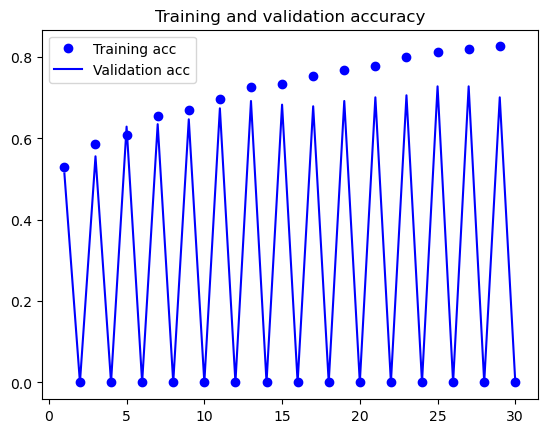

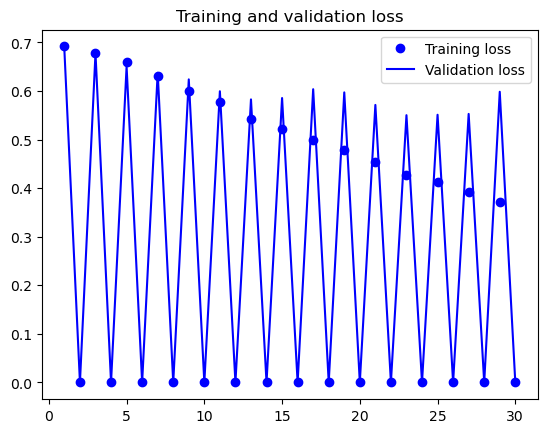

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Over-view of the above trained model!
There are several faults in this training, just because we don't have enough data. According to the book **Deep Learning with Python**, for fitting there is a function called "fit_generator()" but according to my knowledge this function is removed and its functionality is added in "fit()", which can be a cause of these errors. Due to the lack of data, the model struggled alot. That can be seen in the training process that half of the epochs dies in the process, so to increase the efficency and quality of model we have to provide it more data to train!

## Step 5: Setting up a data augmentation configuration via ImageDataGenerator
#### What is Data Augmentation?
https://www.geeksforgeeks.org/what-is-data-augmentation-how-does-data-augmentation-work-for-images/
#### What is a Generator?
* Generator in Python "https://www.geeksforgeeks.org/generators-in-python/"
* Generative Adversarial Network "https://www.geeksforgeeks.org/generative-adversarial-network-gan/"

In [26]:
datagen = ImageDataGenerator(
        rotation_range=40,  # Is a value in degrees (0–180), a range within which to randomly rotate pictures.
        width_shift_range=0.2, height_shift_range=0.2, # Ranges to randomly translate pictures vertically or horizontally.
        shear_range=0.2,  # Is for randomly applying shearing transformations.
        zoom_range=0.2,  # Is for randomly zooming inside pictures.
        horizontal_flip=True,  #  Is for randomly flipping half the images horizontally
        fill_mode='nearest')  #  is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

##### Displaying some randomly augmented training images (For Example)

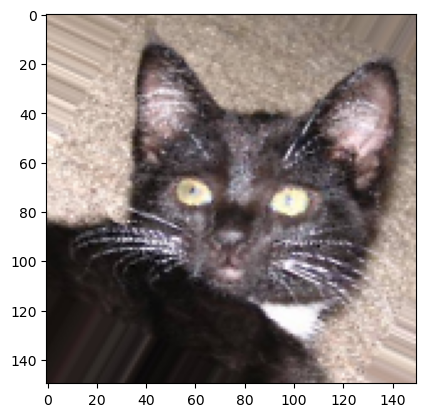

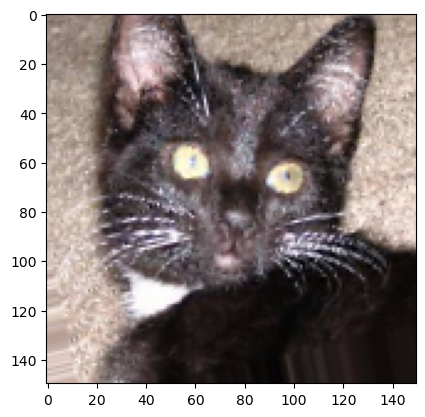

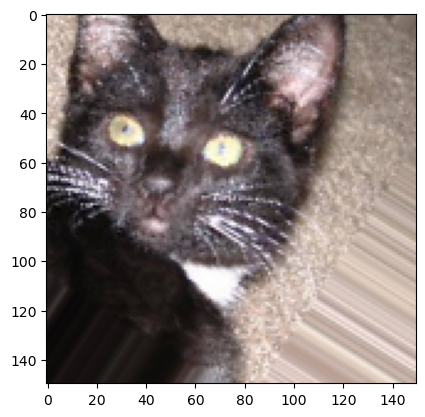

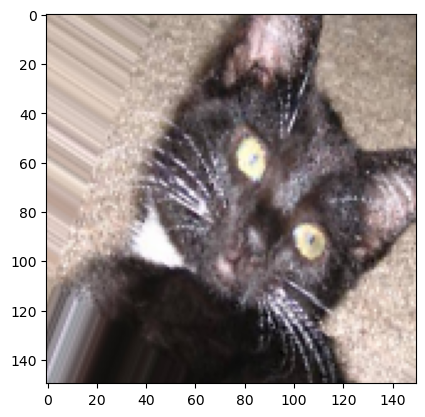

In [28]:
import matplotlib.pyplot as plt

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]     # From this directory! (read next markup line!)

img_path = fnames[5]    # Get this Image!

img = image.load_img(img_path, target_size=(150, 150))     # Loading image in the required size!

x = image.img_to_array(img)     # Converting image into an Array!
x = x.reshape((1,) + x.shape)     # Reshaping!
i=0
for batch in datagen.flow(x, batch_size=1):    # By this loop we are making the 4 augumented images!
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()        # Plotting the images!

#### Points of Concern!
* you can not create new data, but can only remix the existing information/data.
* If we train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images!
* This step will not be enough to fight "Over-fight", but it will reduce a huge amount!

## Step 6: Introducing "Dropout"!
Defining a new convnet that includes dropout!

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))    # This is the "droupout layer"!
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

#### Pre-processing the data with "data-augmentation and dropout."
Training the convnet using data-augmentation generators
#### Caution!
Note that the validation data should never be augmented!

In [32]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)    # Validation/test data!

In [33]:
train_generator = train_datagen.flow_from_directory(     # Train data generator
                train_dir,
                target_size=(150, 150),
                batch_size=32,
                class_mode='binary')      # Since we have used "binary_crossentropy" above, then we need binary labels!

validation_generator = test_datagen.flow_from_directory(    # Test data generator
                    validation_dir,
                    target_size=(150, 150),
                    batch_size=32,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Step 7: Fitting the Model (2nd time) (Large Model) "With Data Augmentation and Drop-out"

In [33]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100


C:\Users\M.TECH COMPUTER\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 63/100 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - acc: 0.5173 - loss: 0.6928

C:\Users\M.TECH COMPUTER\anaconda3\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 72s 689ms/step - acc: 0.5164 - loss: 0.6931 - val_acc: 0.5600 - val_loss: 0.6882
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 656ms/step - acc: 0.5457 - loss: 0.6872 - val_acc: 0.5010 - val_loss: 0.6910
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 625ms/step - acc: 0.5523 - loss: 0.6808 - val_acc: 0.5460 - val_loss: 0.6757
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 712ms/step - acc: 0.5647 - loss: 0.6749 - val_acc: 0.5860 - val_loss: 0.6605
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 622ms/step - acc: 0.5828 - loss: 0.6656 - val_acc: 0.5750 - val_loss: 0.6788
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 655ms/step - acc: 0.5856 - loss: 0.6612 - val_acc: 0.5880 - val_loss: 0.6574
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 670ms/step - acc: 0.5865 - loss: 0.6591 - val_acc: 0.6160 - val_loss: 0.6465
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 619ms/step - acc: 0.6111 - loss: 0.6551 - val_acc: 0.5730 - val_loss: 0.6685
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━

In [34]:
model.save('cats_and_dogs_Large_1.h5')

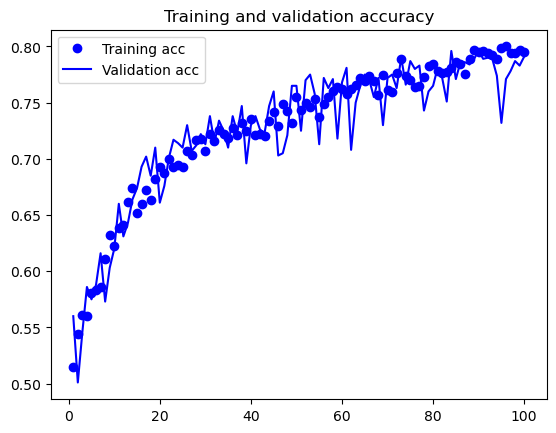

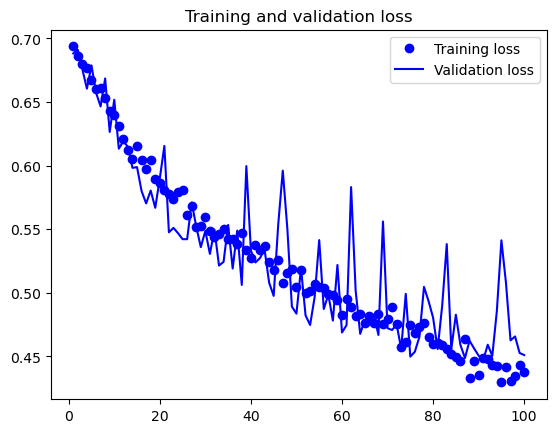

In [35]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Step 8: Using a Pre-Trained Convent to decrease more overfitting
* Its a common and highly effective approach to deep learning on small image datasets is
to use a pretrained network.
* A pretrained network is a saved network that was previously
trained on a large dataset, typically on a large-scale image-classification task
* If this
original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computervision problems, even though these new problems may involve completely different classes than those of the original task.
* You can learn more on "https://www.projectpro.io/recipes/what-are-pretrained-convnets-models-keras"

#### Ways of using Pre-Trained Network
There are two ways to use a pretrained network:
1. Feature extraction
2. Fine-tuning

#### Feature Extraction
feature extraction in detail "https://www.geeksforgeeks.org/what-is-feature-extraction/"

##### What we are using now?
* In this case, because the ImageNet class set contains multiple dog and cat classes, it’s likely to be beneficial to reuse the information contained in the densely connected layers of the original model. But we’ll choose not to, in order to cover the more general case where the class set of the new problem doesn’t overlap the class set of the original model. Let’s put this in practice by using the convolutional base of the "VGG16 network", trained on "ImageNet", to extract interesting features from cat and dog images, and then train a dogs-versus-cats classifier on top of these features.
* The **VGG16 model**, among others, comes prepackaged with Keras. You can import it from the keras.applications module. Here’s the list of image-classification models (all pretrained on the ImageNet dataset) that are available as part of keras.applications:
1. Xception
2. Inception V3
3. ResNet50
4. VGG16
5. VGG19
6. MobileNet

In [34]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
            include_top=False,
            input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 55s 1us/step


In [35]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

* The final feature map has shape (4, 4, 512). That’s the feature on top of which you’ll stick a densely connected classifier. At this point, there are two ways you could proceed:
1. Running the convolutional base over your dataset, recording its output to a Numpy array on disk, and then using this data as input to a standalone, densely connected classifier similar to those you saw in part 1 of this book. This solution is fast and cheap to run, because it only requires running the convolutional base once for every input image, and the convolutional base is by far the most expensive part of the pipeline. But for the same reason, this technique won’t allow you to use data augmentation.
2. Extending the model you have (conv_base) by adding Dense layers on top, and running the whole thing end to end on the input data. This will allow you to use data augmentation, because every input image goes through the convolutional base every time it’s seen by the model. But for the same reason, this technique is far more expensive than the first.
* We’ll cover both techniques. Let’s walk through the code required to set up the first one: recording the output of conv_base on your data and using these outputs as inputs to a new model.

#### 1st Type: FAST FEATURE EXTRACTION "WITHOUT DATA AUGMENTATION"
You’ll start by running instances of the previously introduced ImageDataGenerator to extract images as Numpy arrays as well as their labels. You’ll extract features from these images by calling the predict method of the conv_base model.

In [37]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))   # Creating Empty Matrix for the feature, with the exact size of final feature map(in summary)
    labels = np.zeros(shape=(sample_count))   # Creating Labels
    generator = datagen.flow_from_directory(    # Generating data using "Generator"
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    # Note that because generators yield data indefinitely in a loop, you must break after every image has been seen once.
    i=0
    for inputs_batch, labels_batch in generator:    
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch   # Adding the real features in the empty feature matrix!
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch    # Adding the real labels in the empty labels matrix!
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━

In [38]:
train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

In [39]:
from keras import models
from keras import layers
from keras import optimizers

At this point, we can define your densely connected classifier (note: the use of dropout for regularization) and train it on the data and labels that we just recorded.

In [40]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
                        loss='binary_crossentropy',
                        metrics=['acc'])
history = model.fit(train_features, train_labels,epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

C:\Users\M.TECH COMPUTER\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.5708 - loss: 0.7005 - val_acc: 0.8300 - val_loss: 0.4562
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.7938 - loss: 0.4589 - val_acc: 0.8640 - val_loss: 0.3703
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.8443 - loss: 0.3655 - val_acc: 0.8790 - val_loss: 0.3290
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - acc: 0.8645 - loss: 0.3272 - val_acc: 0.8850 - val_loss: 0.3039
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.8869 - loss: 0.2945 - val_acc: 0.8850 - val_loss: 0.2909
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.8876 - loss: 0.2745 - val_acc: 0.8890 - val_loss: 0.2774
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - acc: 0.8930 - loss: 0.2683 - val_acc: 0.8990 - val_loss: 0.2689
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.8908 - loss: 0.2446 - val_acc: 0.8900 - val_loss: 0.2675
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/

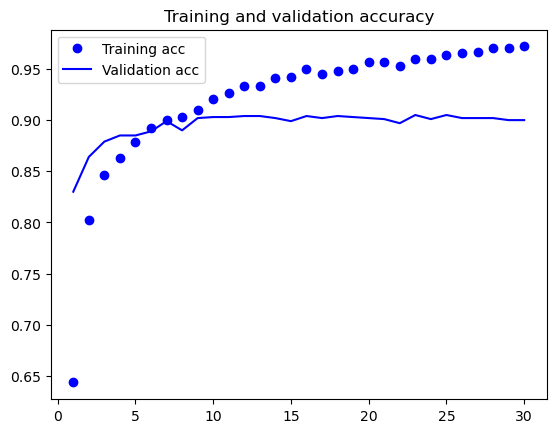

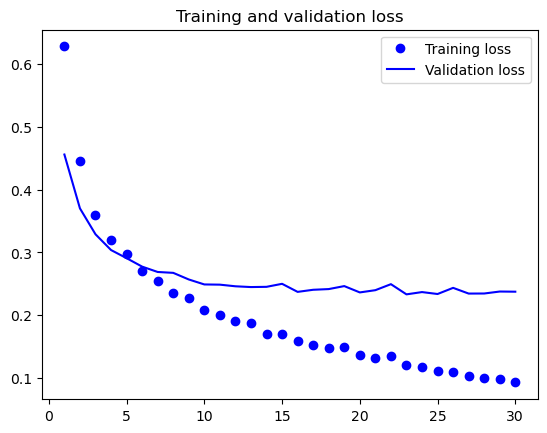

In [41]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
model.save('cats_and_dogs_FFE_1.h5')

#### Now, what do we get by fast feature extraction?
You reach a validation accuracy of about 90%—much better than you achieved in the previous section with the small model trained from scratch. But the plots also indicate that you’re overfitting almost from the start—despite using dropout with a fairly large rate. That’s because this technique doesn’t use data augmentation, which is essential for preventing overfitting with small image datasets. 

## Now, For FEATURE EXTRACTION "WITH DATA AUGMENTATION"
The second technique I mentioned for doing feature extraction, which is much slower and more expensive, but which allows you to use data augmentation during training: extending the conv_base model and running it end to end on the inputs.
### NOTE:
This technique is so expensive that you should only attempt it if you have access to a GPU—it’s absolutely intractable on CPU. If you can’t run your code on GPU, then the previous technique is the way to go.
#### I am Ending this Notebook here cause I dont have access to a (Powerfull-enough) "GPU" right now.
#### Will Complete the topic of "FEATURE EXTRACTION WITH DATA AUGMENTATION" in near future!

### Models we have trained in this notebook on same dataset.
* **"cats_and_dogs_small_1.h5"** it has the accuracy of **81.94%** and validation accuracy of **70.10%**. But! this network is not properly trained, because the lack of data, 50% of its epochs died!
* **"cats_and_dogs_Large_1.h5"** it has the accuracy of **79.12%** and validation accuracy of **79.10%**. This network trained normally under droupout and data augmentation! It is based on Large Network!
* **"cats_and_dogs_FFE_1.h5"** it has the accuracy of **97.31%** and validatioon accuracy of **90.00%**. This network is trained under the "Fast feature extraction" of **VGG16 model**, it has a very high accuracy